#### Carregando as importações

In [1]:
import import_ipynb
from preprocessing_DL_smote import *
from imports.imports_common_models_DL import *

importing Jupyter notebook from preprocessing_DL_smote.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_preprocessing.ipynb
importing Jupyter notebook from load_dataset.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb


ValueError: Found array with dim 3. SMOTE expected <= 2.

In [3]:
# Define a arquitetura da CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = 'accuracy')
# Compila o modelo
#model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Treina o modelo}
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data = validation_data, callbacks=[early_stop])

# Plota os gráficos de perda e acurácia
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()


# Avalia o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

NameError: name 'validation_data' is not defined

Epoch 1/30
98/98 [==============================] - 41s 410ms/step - loss: 1.0496 - accuracy: 0.4946 - val_loss: 0.9944 - val_accuracy: 0.5037
Epoch 2/30
98/98 [==============================] - 38s 383ms/step - loss: 0.9529 - accuracy: 0.5453 - val_loss: 0.9241 - val_accuracy: 0.5565
Epoch 3/30
98/98 [==============================] - 31s 321ms/step - loss: 0.8581 - accuracy: 0.5998 - val_loss: 0.8818 - val_accuracy: 0.5863
Epoch 4/30
98/98 [==============================] - 34s 348ms/step - loss: 0.7693 - accuracy: 0.6642 - val_loss: 0.7767 - val_accuracy: 0.6399
Epoch 5/30
98/98 [==============================] - 33s 333ms/step - loss: 0.6196 - accuracy: 0.7462 - val_loss: 0.6388 - val_accuracy: 0.7143
Epoch 6/30
98/98 [==============================] - 33s 337ms/step - loss: 0.4854 - accuracy: 0.8061 - val_loss: 0.5785 - val_accuracy: 0.7493
Epoch 7/30
98/98 [==============================] - 34s 347ms/step - loss: 0.3902 - accuracy: 0.8399 - val_loss: 0.5209 - val_accuracy: 0.7939

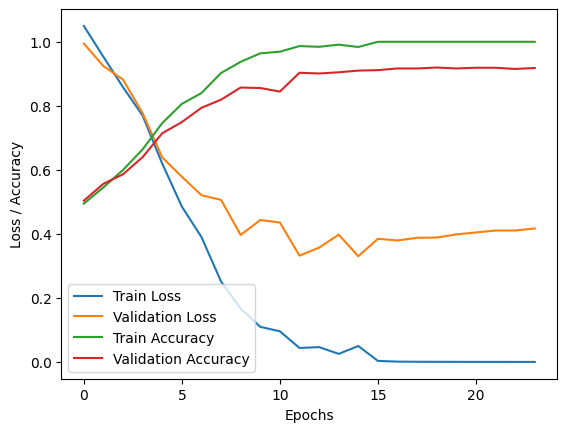

60/60 [==============================] - 6s 95ms/step - loss: 0.4517 - accuracy: 0.9115
Test Loss: 0.45168209075927734
Test Accuracy: 0.9114583134651184


In [ ]:
# Define a arquitetura da CNN
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (2,2), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
# Compila o modelo
#model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Treina o modelo}
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data = validation_data, callbacks=[early_stop])

# Plota os gráficos de perda e acurácia
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()


# Avalia o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)